In [ ]:
pip install kserve

In [ ]:
from kserve import RESTConfig, InferenceRESTClient, InferRequest, InferInput
from PIL import Image
import matplotlib.pyplot as plt
from torchvision import datasets, transforms
from random import randrange
import numpy as np
import os
import json
import requests

In [6]:
# Download dataset
!wget https://s3-us-west-1.amazonaws.com/udacity-aind/dog-project/dogImages.zip


--2025-05-16 16:43:58--  https://s3-us-west-1.amazonaws.com/udacity-aind/dog-project/dogImages.zip
Resolving s3-us-west-1.amazonaws.com (s3-us-west-1.amazonaws.com)... 52.219.194.8, 52.219.216.88, 52.219.220.176, ...
Connecting to s3-us-west-1.amazonaws.com (s3-us-west-1.amazonaws.com)|52.219.194.8|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 1132023110 (1.1G) [application/zip]
Saving to: ‘dogImages.zip’

dogImages.zip       100%[===================>]   1.05G   553KB/s    in 34m 55s 

2025-05-16 17:18:54 (528 KB/s) - ‘dogImages.zip’ saved [1132023110/1132023110]



In [7]:
%%sh
unzip -q dogImages.zip
mv dogImages dog-breeds-dataset

In [113]:
# Dataset
ds_dog_breeds_path = "./dog-breeds-dataset"
test_ds_dog_breeds_path = os.path.join(ds_dog_breeds_path, "test")
ds_dog_breeds = datasets.ImageFolder(test_ds_dog_breeds_path)
dog_breeds_classes = ds_dog_breeds.find_classes(test_ds_dog_breeds_path)[0]

print(f"Classes dog_breeds_classifier: {dog_breeds_classes}")

Classes dog_breeds_classifier: ['001.Affenpinscher', '002.Afghan_hound', '003.Airedale_terrier', '004.Akita', '005.Alaskan_malamute', '006.American_eskimo_dog', '007.American_foxhound', '008.American_staffordshire_terrier', '009.American_water_spaniel', '010.Anatolian_shepherd_dog', '011.Australian_cattle_dog', '012.Australian_shepherd', '013.Australian_terrier', '014.Basenji', '015.Basset_hound', '016.Beagle', '017.Bearded_collie', '018.Beauceron', '019.Bedlington_terrier', '020.Belgian_malinois', '021.Belgian_sheepdog', '022.Belgian_tervuren', '023.Bernese_mountain_dog', '024.Bichon_frise', '025.Black_and_tan_coonhound', '026.Black_russian_terrier', '027.Bloodhound', '028.Bluetick_coonhound', '029.Border_collie', '030.Border_terrier', '031.Borzoi', '032.Boston_terrier', '033.Bouvier_des_flandres', '034.Boxer', '035.Boykin_spaniel', '036.Briard', '037.Brittany', '038.Brussels_griffon', '039.Bull_terrier', '040.Bulldog', '041.Bullmastiff', '042.Cairn_terrier', '043.Canaan_dog', '044.Ca

None


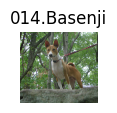

In [114]:
# Show sample image
fig = plt.figure(figsize=(1, 1))
sample_idx = randrange(len(ds_dog_breeds))

img, label = ds_dog_breeds[sample_idx]
fig.add_subplot(1, 1, 1)

plt.title(dog_breeds_classes[label])
plt.axis("off")
plt.imshow(img)
plt.show()

In [115]:
img_array = np.array(img.convert('RGB'))

if img_array.ndim == 3:
    img_array = np.expand_dims(img_array, axis=0)  # Add batch dimension
print(img_array.shape)


(1, 1225, 1333, 3)


In [ ]:
# Inference
model_name = "dog-breeds-classifier"
request = InferRequest(
    model_name=model_name,
    infer_inputs=[
        InferInput(
            name="data",
            shape=list(img_array.shape),
            datatype="FP32",
            data=img_array.tolist()
        )
    ]
)

cfg = RESTConfig(protocol="v2", verify=False)
client = InferenceRESTClient(cfg)
# To get base_url: 
# oc get isvc dog-breeds-classifier -n modelserving-demo -o jsonpath='{.status.url}'
base_url = "https://dog-breeds-classifier-modelserving-demo.apps.rosa.n1t3u2f3w1s0b1d.kkw2.p3.openshiftapps.com"

In [ ]:
infer_response = await client.infer(
    base_url,
    request,
    request.model_name,
    is_graph_endpoint=False
)
det_class = dog_breeds_classes[np.argmax(infer_response.outputs[0].data)]
print("Raw response: ", infer_response)
print(f"Detected class: {det_class}")

Raw response:  "id": "898f3528-6503-4579-8ba1-dba0dfb651a8","model_name": "dog-breeds-classifier","outputs": ["name": "495","shape": [1, 133],"datatype": "FP32","data": [-13.9765625, -9.15625, -9.8984375, -6.9765625, -16.75, -14.6640625, -6.42578125, -5.94921875, -13.75, -8.9609375, -9.0, -12.453125, -11.59375, 4.0703125, -10.84375, -8.671875, -13.3046875, -13.9765625, -12.2421875, -8.6796875, -14.8203125, -13.8828125, -18.671875, -15.9453125, -14.8203125, -15.2109375, -11.859375, -12.90625, -16.0, -13.9375, -8.1171875, -8.1953125, -16.328125, -5.31640625, -15.21875, -14.6953125, -11.25, -14.265625, -3.70703125, -10.796875, -11.15625, -11.328125, -0.53271484375, -11.0703125, -7.90234375, -12.953125, -12.078125, -6.59375, -5.58984375, -10.1875, -13.7109375, -16.5, -13.5390625, -8.6484375, -12.859375, -11.09375, -12.0859375, -16.859375, -8.3984375, -9.0546875, -11.640625, -16.125, -10.078125, -15.4453125, -10.5703125, -18.5, -7.34765625, -15.0859375, -10.2109375, -4.4375, -14.296875, -10